## Import Libraries

In [31]:
# Data Manipulation Libraries
import pandas as pd 

# Data Visualization Libraries  
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 

# Machine Learning Libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Others  
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

## Data Collection

In [4]:
df = pd.read_csv(r"H:\Programming\Dataset\Machine Learning\Placement (1).csv")
df.head()

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0


## Data Understanding

In [6]:
print("Info: ")

print(df.info())
print("\nNull values: ")
print(df.isnull().sum())
print("\nDuplicates: ")
print(df.duplicated().sum())

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  100 non-null    int64  
 1   CGPA        100 non-null    float64
 2   IQ          100 non-null    int64  
 3   Placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.3 KB
None

Null values: 
Student_ID    0
CGPA          0
IQ            0
Placement     0
dtype: int64

Duplicates: 
0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  100 non-null    int64  
 1   CGPA        100 non-null    float64
 2   IQ          100 non-null    int64  
 3   Placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


## Data Cleaning 

In [9]:
df.drop(columns=['Student_ID'], inplace=True) 
df.head(3)

,CGPA,IQ,Placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0


## Exploratory Data Analysis (EDA)

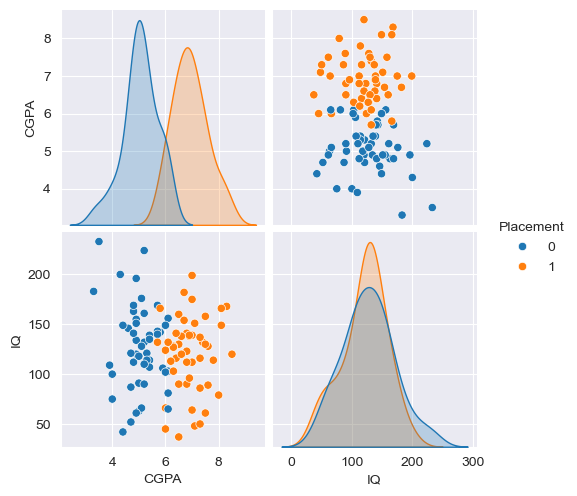

In [11]:
sns.pairplot(df, hue="Placement") 
plt.show()

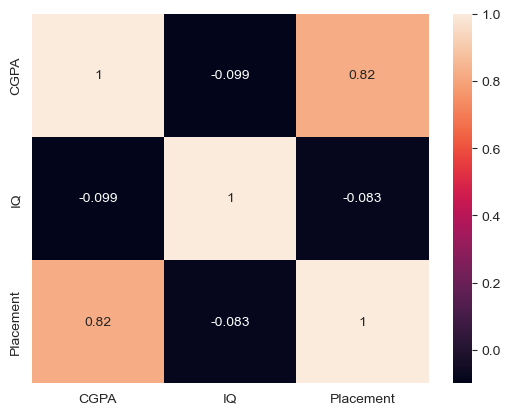

In [12]:
sns.heatmap(df.corr(), annot=True)
plt.show()

## Modeling 

In [14]:
x = df.iloc[:,:-1]
y = df['Placement']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


### LogisticRegression

In [17]:
lor = LogisticRegression()
lor.fit(x_train, y_train)

LogisticRegression()

In [18]:
print(f"Model Accuracy: {lor.score(x_test, y_test)*100:.2f} %")

Model Accuracy: 85.00 %


# Confusion Matrix

In [34]:
y_pred = lor.predict(x_test)
cf = confusion_matrix(y_test, y_pred)
cf

array([[9, 1],
       [2, 8]], dtype=int64)

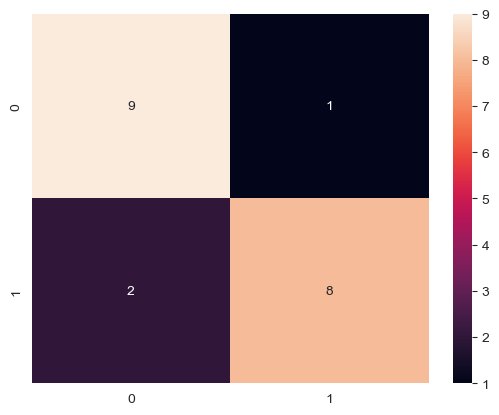

In [37]:
sns.heatmap(cf, annot=True) 
plt.show()

# Scores

In [60]:
print(f"Precision Score: {precision_score(y_test, y_pred)*100:.2f}%")


Precision Score: 88.89%


In [62]:
print(f"Recall Score: {recall_score(y_test, y_pred)*100:.2f}%")


Recall Score: 80.00%


In [64]:
print(f"F1 Score: {f1_score(y_test, y_pred)*100:.2f}%")


F1 Score: 84.21%


# Result

In [82]:
ps = round(precision_score(y_test, y_pred, zero_division=0)*100,2)
rs = round(recall_score(y_test, y_pred, zero_division=0)*100,2)
f1 = round(f1_score(y_test, y_pred, zero_division=0)*100,2)

accuracy = {
    "Precision Score": [ps],
    "Recall Score": [rs],
    "F1 Score": [f1]
}

result = pd.DataFrame(accuracy)
result

,Precision Score,Recall Score,F1 Score
0,88.89,80.0,84.21


# Pro tip (industry standard)

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.89      0.80      0.84        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



In [88]:
import pandas as pd
from sklearn.metrics import classification_report

report_dict = classification_report(
    y_test,
    y_pred,
    output_dict=True,
    zero_division=0
)

result = pd.DataFrame(report_dict).transpose()
result


,precision,recall,f1-score,support
0,0.818182,0.90,0.857143,10.00
1,0.888889,0.80,0.842105,10.00
accuracy,0.850000,0.85,0.850000,0.85
macro avg,0.853535,0.85,0.849624,20.00
weighted avg,0.853535,0.85,0.849624,20.00


# Best Model Selection with Confusion Matrix

Best Model : Random Forest
Best F1    : 0.8889


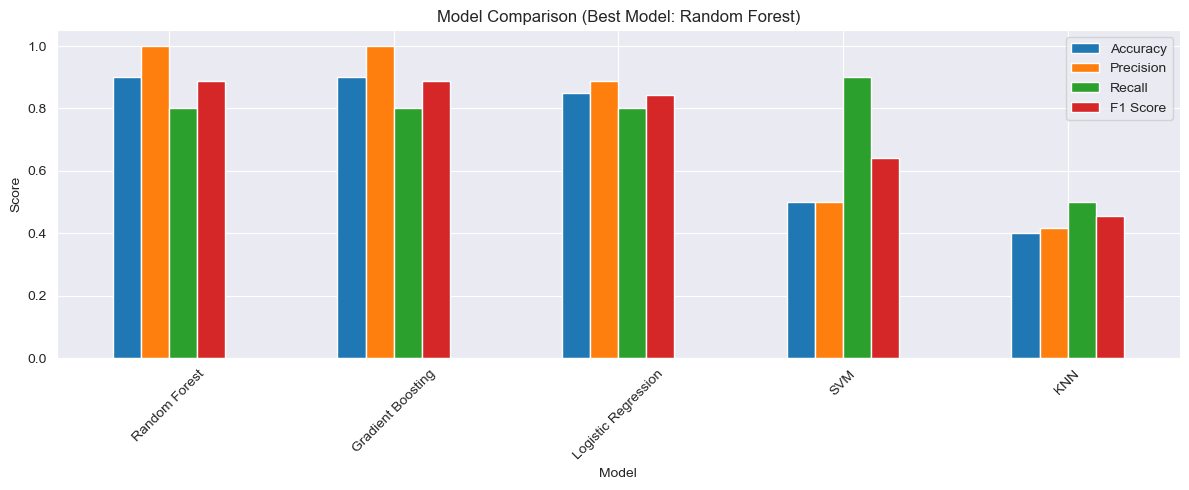

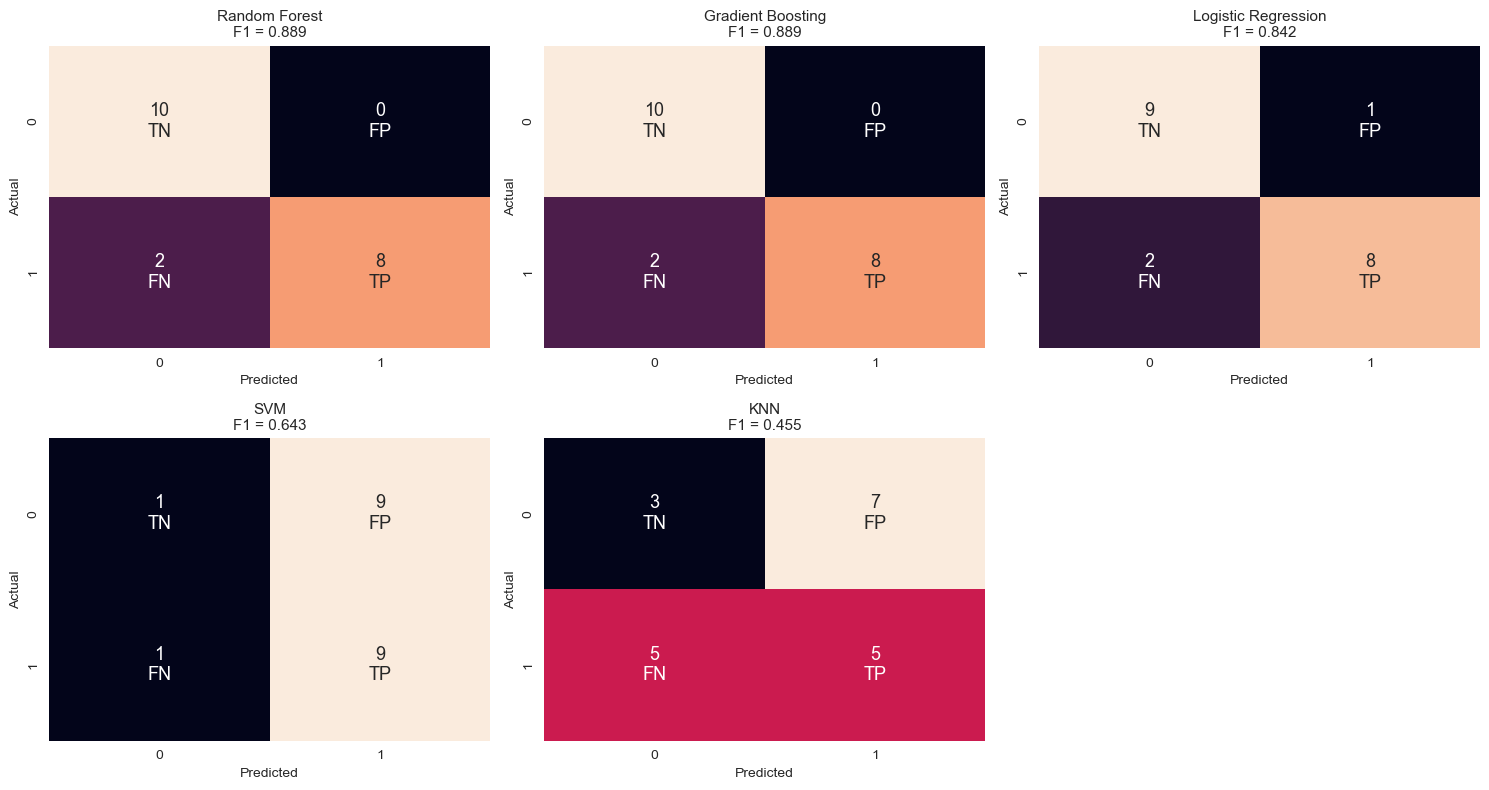


Model Performance Summary


,Accuracy,Precision,Recall,F1 Score
Random Forest,0.90,1.0000,0.8,0.8889
Gradient Boosting,0.90,1.0000,0.8,0.8889
Logistic Regression,0.85,0.8889,0.8,0.8421
SVM,0.50,0.5000,0.9,0.6429
KNN,0.40,0.4167,0.5,0.4545



Confusion Matrix Error Breakdown (Sorted by FN ↓)


,TN,FP,FN,TP
KNN,3,7,5,5
Logistic Regression,9,1,2,8
Random Forest,10,0,2,8
Gradient Boosting,10,0,2,8
SVM,1,9,1,9


In [150]:
# ======================================================
# 1. IMPORT LIBRARIES
# ======================================================
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

sns.set_style("darkgrid")

# ==============================
# STEP 2: Encode Target Column
# ==============================
# encoder = LabelEncoder()
# df['Placement'] = encoder.fit_transform(df['Placement'])


# ======================================================
# 3. FEATURES & TARGET
# ======================================================
X = df.drop(columns="Placement")
y = df["Placement"]


# ======================================================
# 4. TRAIN–TEST SPLIT
# ======================================================
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# ======================================================
# 5. MODEL DEFINITIONS
# ======================================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


# ======================================================
# 6. TRAINING, EVALUATION & STORAGE
# ======================================================
metrics_store = {}
confusion_store = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics_store[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1 Score": f1_score(y_test, y_pred, zero_division=0)
    }

    confusion_store[model_name] = confusion_matrix(y_test, y_pred)


# ======================================================
# 7. METRICS DATAFRAME (SORTED BY F1)
# ======================================================
results_df = (
    pd.DataFrame(metrics_store)
    .T
    .sort_values(by="F1 Score", ascending=False)
)

best_model = results_df.index[0]
best_f1 = results_df.loc[best_model, "F1 Score"]

print(f"Best Model : {best_model}")
print(f"Best F1    : {best_f1:.4f}")


# ======================================================
# 8. METRIC COMPARISON PLOT
# ======================================================
results_df.plot(kind="bar", figsize=(12, 5))
plt.title(f"Model Comparison (Best Model: {best_model})")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ======================================================
# 9. CONFUSION MATRIX GRID (PROFESSIONAL)
#    - Sorted by F1
#    - TN FP FN TP inside cells
# ======================================================
sorted_models = results_df.index.tolist()
n_cols = 3
n_rows = math.ceil(len(sorted_models) / n_cols)

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(5 * n_cols, 4 * n_rows)
)
axes = axes.flatten()

for i, model_name in enumerate(sorted_models):
    cm = confusion_store[model_name]
    tn, fp, fn, tp = cm.ravel()

    annot_labels = [
        [f"{tn}\nTN", f"{fp}\nFP"],
        [f"{fn}\nFN", f"{tp}\nTP"]
    ]

    sns.heatmap(
        cm,
        annot=annot_labels,
        fmt="",
        # cmap="Blues",
        annot_kws={"size": 13},
        cbar=False,
        ax=axes[i]
    )

    axes[i].set_title(
        f"{model_name}\nF1 = {results_df.loc[model_name, 'F1 Score']:.3f}",
        fontsize=11
    )
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


# ======================================================
# 10. TN–FP–FN–TP SUMMARY TABLE (ERROR ANALYSIS)
# ======================================================
cm_summary = {}

for model_name, cm in confusion_store.items():
    tn, fp, fn, tp = cm.ravel()
    cm_summary[model_name] = {
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TP": tp
    }

cm_df = pd.DataFrame(cm_summary).T


# ======================================================
# 11. FINAL OUTPUT TABLES (SORTED)
# ======================================================

# Sort confusion matrix breakdown by FN (descending)
cm_df_sorted = cm_df.sort_values(by="FN", ascending=False)

print("\nModel Performance Summary")
display(results_df.round(4))

print("\nConfusion Matrix Error Breakdown (Sorted by FN ↓)")
display(cm_df_sorted)

